<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_mod7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Priyanshu-4096/21BDS0083_EDA

#Name - Priyanshu Joarder
#Reg no - 21BDS0083
#Course Title - Exploratory Data Analysis
#Course Code - BCSE331L

Data Cleaning

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('SuicideChina.csv')

# Step 1: Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 2: Standardize Categorical Values
# Convert all values in categorical columns to lowercase for consistency
categorical_cols = ['Hospitalised', 'Died', 'Urban', 'Sex', 'Education', 'Occupation', 'method']
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.lower())

# Step 3: Convert Data Types
# Converting 'Year' and 'Month' to datetime format and creating a 'Date' column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1), errors='coerce')

# Step 4: Outlier Detection and Removal
# Checking for outliers in 'Age' assuming reasonable human ages (e.g., between 0 and 120)
age_outliers = data[(data['Age'] < 0) | (data['Age'] > 120)]
print("Age Outliers:\n", age_outliers)

# Step 5: Remove Duplicates
# Checking and removing any duplicate entries based on 'Person_ID' or complete row duplication
data = data.drop_duplicates(subset='Person_ID')

# Step 6: Check Consistency and Logical Validity
# Verify logical consistency (e.g., if 'Died' is 'yes', 'Hospitalised' should ideally be 'yes')
inconsistencies = data[(data['Died'] == 'yes') & (data['Hospitalised'] == 'no')]
print("Potential Inconsistencies:\n", inconsistencies)

# Step 7: Encoding for Categorical Columns
# Converting 'yes'/'no' columns and 'Sex' to numeric format for analysis
data['Hospitalised'] = data['Hospitalised'].map({'yes': 1, 'no': 0})
data['Died'] = data['Died'].map({'yes': 1, 'no': 0})
data['Urban'] = data['Urban'].map({'yes': 1, 'no': 0})
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Show the cleaned data information
print("Cleaned Data Info:\n")
print(data.info())


Missing Values:
 rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64
Age Outliers:
 Empty DataFrame
Columns: [rownames, Person_ID, Hospitalised, Died, Urban, Year, Month, Sex, Age, Education, Occupation, method, Date]
Index: []
Potential Inconsistencies:
       rownames  Person_ID Hospitalised Died    Urban  Year  Month     Sex  \
1            2          2           no  yes       no  2009      3    male   
2            3          3           no  yes       no  2010      2    male   
3            4          4           no  yes       no  2011      1    male   
5            6          6           no  yes       no  2009     11    male   
6            7          7           no  yes       no  2010      1  female   
...        ...        ...          ...  ...      ...   ...    ...     ...   
2485      2486       2486   

Module 7: Model Development and Evaluation

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load cleaned data (Assume data has already been cleaned in the steps above)
# Replace 'target_column' with the actual column name you want to predict
target_column = 'Age'  # Example target; change as needed

# Separate features (X) and target (y)
X = data.drop(columns=[target_column, 'Date', 'Person_ID', 'rownames'])  # Drop unnecessary columns
y = data[target_column]

# Step 1: One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to binary columns

# Step 2: Handle missing values in features
# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (Accuracy):", r2)

# Interpretation of R-squared
print(f"The model explains approximately {r2 * 100:.2f}% of the variability in the target variable '{target_column}'.")


Mean Squared Error (MSE): 207.45479921542687
R-squared (Accuracy): 0.4707457598117132
The model explains approximately 47.07% of the variability in the target variable 'Age'.


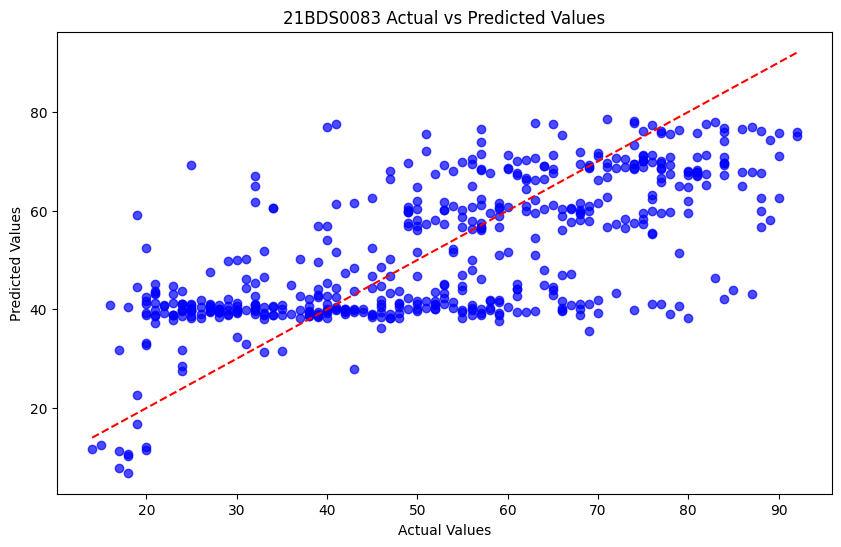

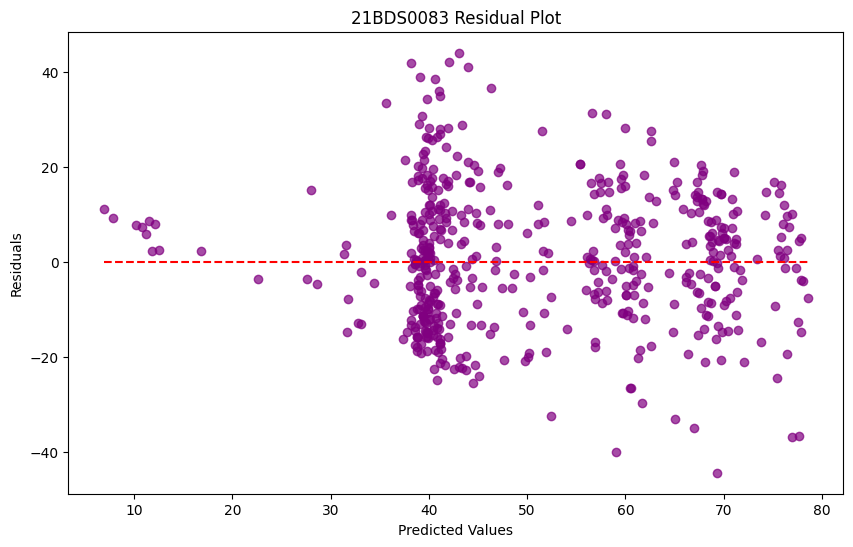

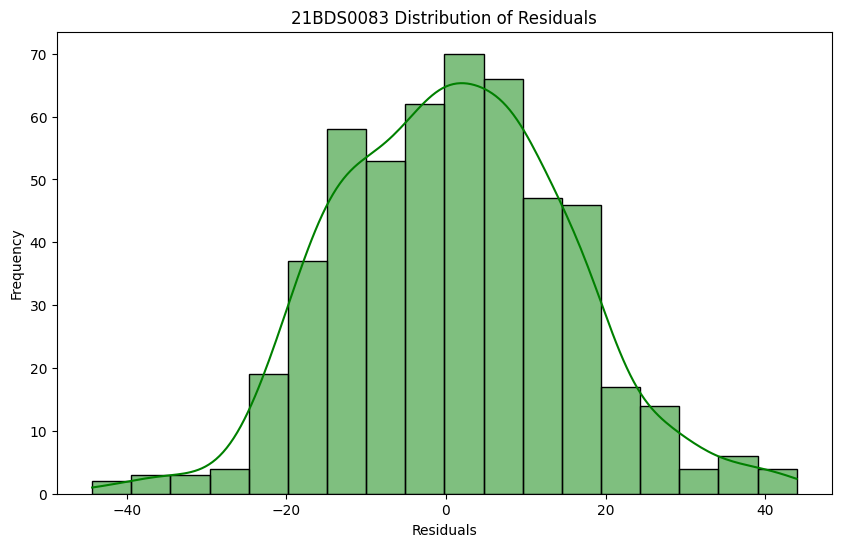

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("21BDS0083 Actual vs Predicted Values")
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("21BDS0083 Residual Plot")
plt.show()

# Plot 3: Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("21BDS0083 Distribution of Residuals")
plt.show()


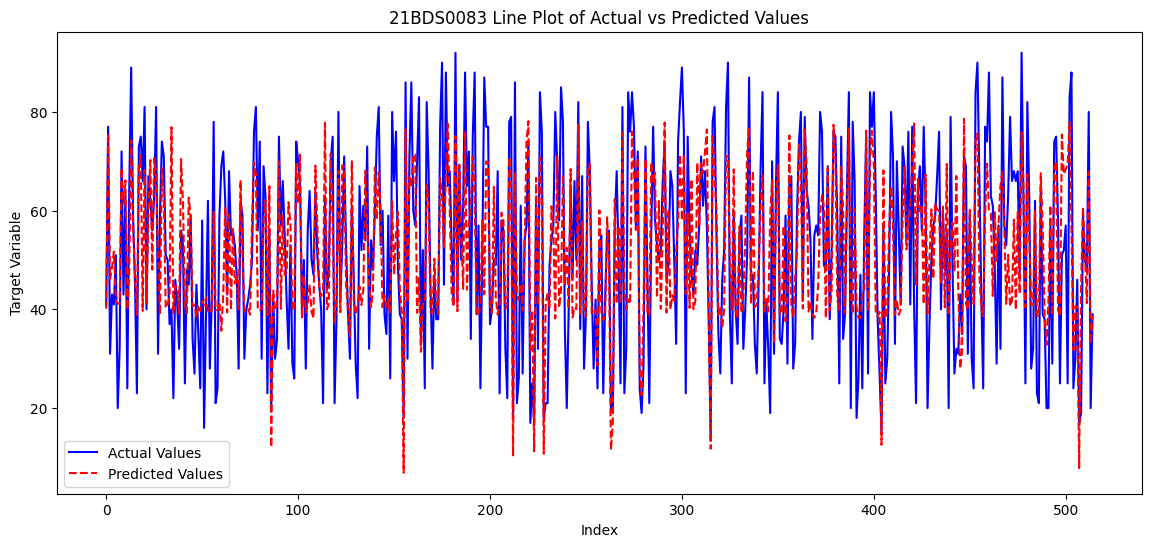

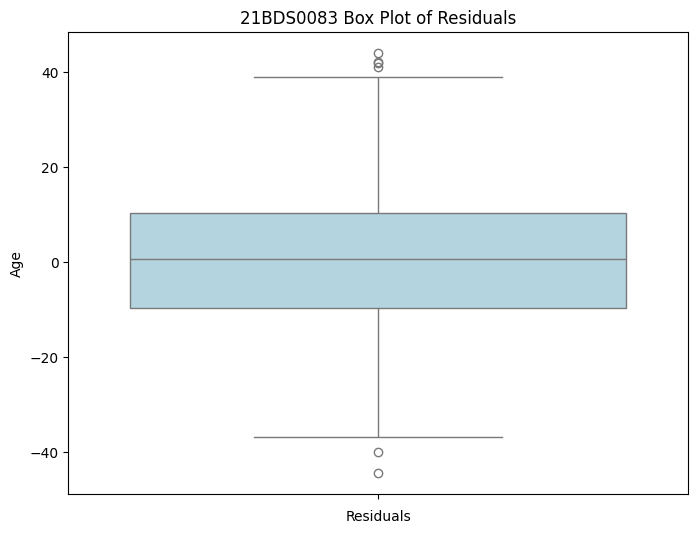

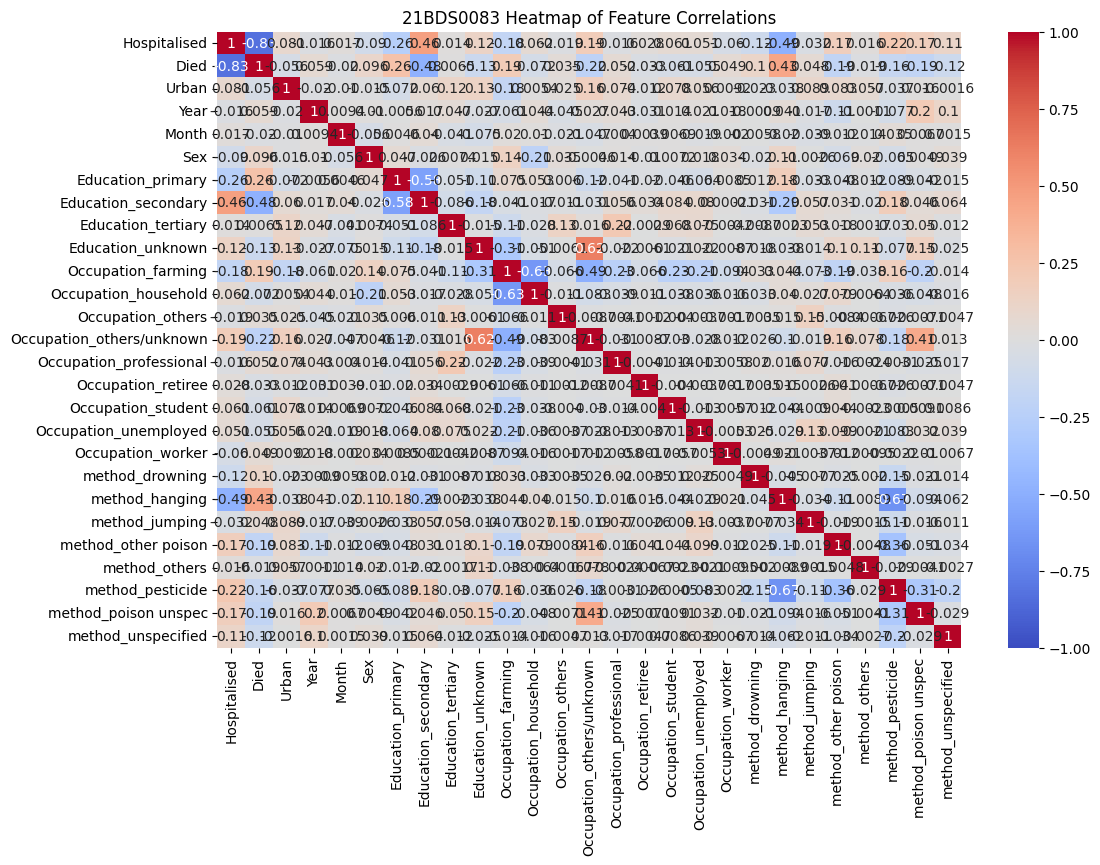

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Line Plot: Predicted vs Actual Values
plt.figure(figsize=(14, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue', linestyle='-')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.title("21BDS0083 Line Plot of Actual vs Predicted Values")
plt.legend()
plt.show()

# Box Plot: Distribution of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.boxplot(data=residuals, color='lightblue')
plt.title("21BDS0083 Box Plot of Residuals")
plt.xlabel("Residuals")
plt.show()

# Heatmap: Correlation Matrix of Features
# Compute correlation matrix of features
corr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("21BDS0083 Heatmap of Feature Correlations")
plt.show()
